# <span style="color:red">  Lecture 2</span>
---

### Abstract
This lecture consists of two exercises:
1. in the first one, we compute the following 1D integral $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ via Monte Carlo sampling. The $x$ used to compute the value of $I$ have been extracted, in the first place from a uniform distribution, i.e. $x$ ~ $\chi_{[0, 1)}$, and then using importance sampling, i.e. from a handmade distribution $g(x)$ which should resemble the (normalized) integrated function $f(x) = \frac{\pi}{2}\cos(\pi x/2)$;
    
    
2. in the second exercise, instead, 3D Random Walks (RW) are simulated, both on a cubic lattice and in the continuum. During each simulation, the value of $\sigma_N \equiv \sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ is computed for both the continous and discrete 3D RW, which is then compared to the expected teorical value, i.e. $\sigma_N = a\sqrt{N}$, $N$ being the number of steps performed by the walker.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigma(x, a):
    return a*np.sqrt(x)

def f(x):
    return np.pi/2. * np.cos(np.pi*x/2.)
    
def g(x):
    return 2. * (1. - x)

### Exercise 02.1

In [3]:
df_media = pd.read_csv("../data/data_02.1/media_data.dat", sep="\t")
df_sample = pd.read_csv("../data/data_02.1/sample_data.dat", sep="\t")

x = np.arange(len(df_media)) + 1
mean_teo = np.zeros(len(df_media)) + 1.

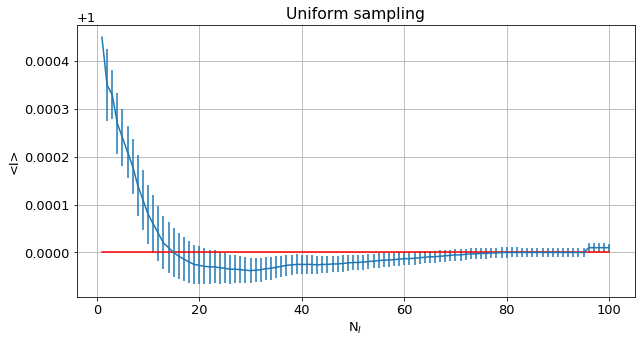

On the last block
I estimate:  1.00001 ,	error:  0.0000087 ,	expected value:  1.0


In [4]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Uniform sampling")
ax.errorbar(x, df_media.iloc[:, 0], yerr=df_media.iloc[:, 1])
ax.plot(x, mean_teo, color='r', linestyle='-')

ax.set_xlabel(r"N$_I$")
ax.set_ylabel("<I>")
ax.grid(True)
plt.show()

print("On the last block")
print("I estimate: ", format(df_media.iloc[-1, 0], '.5f'), ",\terror: ", format(df_media.iloc[-1, 1], '.7f'), ",\texpected value: ", 1.)

Starting from the uniform sampling, we can observe that the estimate is compatible with the exact result within the statistical error.

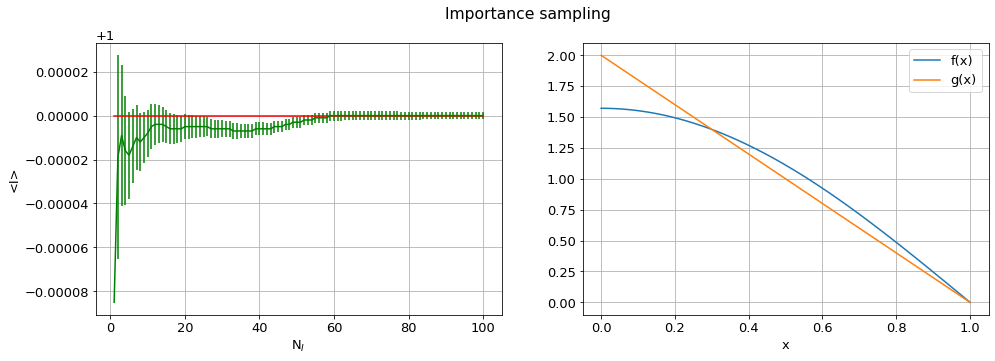

On the last block
I estimate:  1.00000 ,	error:  0.0000015 ,	expected value:  1.0


In [5]:
plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2) = plt.subplots(figsize=(16, 5), ncols=2)
fig.suptitle("Importance sampling")

ax = ax1
ax.errorbar(x, df_sample.iloc[:, 0], yerr=df_sample.iloc[:, 1], color="green")
ax.plot(x, mean_teo, color='r', linestyle='-')
ax.set_xlabel(r"N$_I$")
ax.set_ylabel("<I>")
ax.grid(True)

ax = ax2
x = np.linspace(0, 1, 100)
ax.plot(x, f(x), label="f(x)")
ax.plot(x, g(x), label="g(x)")
ax.set_xlabel("x")
ax.legend()
ax.grid(True)

plt.show()

print("On the last block")
print("I estimate: ", format(df_sample.iloc[-1, 0], '.5f'), ",\terror: ", format(df_sample.iloc[-1, 1], '.7f'), ",\texpected value: ", 1.)

Proceeding with the importance sampling, we can observe that the estimate is compatible with the exact result within the statistical error. Furthermore, the convergence is much more quick then in the previous case, even with a poor approximation such as the one here employed: 

$$g(x) = 2(1 - x)$$

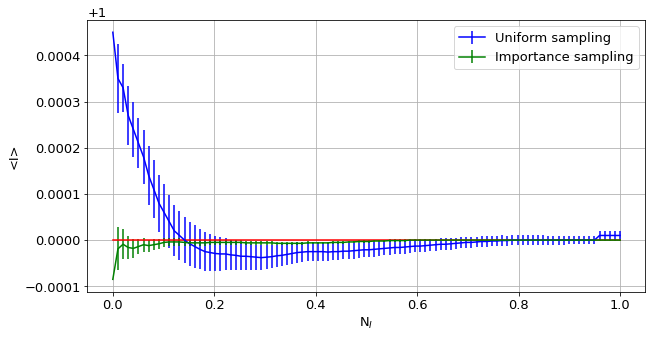

On the last block
(uniform)    estimate: 1.000010 ± 0.0000087,	expected value:  1.0
(importance) estimate: 1.000000 ± 0.0000015,	expected value:  1.0


In [6]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(x, df_media.iloc[:, 0], yerr=df_media.iloc[:, 1], color="blue", label="Uniform sampling")
ax.errorbar(x, df_sample.iloc[:, 0], yerr=df_sample.iloc[:, 1], color="green", label="Importance sampling")
ax.plot(x, mean_teo, color='r', linestyle='-')

ax.set_xlabel(r"N$_I$")
ax.set_ylabel("<I>")
ax.grid(True)
ax.legend()
plt.show()

print("On the last block")
print(f"(uniform)    estimate: {format(df_media.iloc[-1, 0], '.6f')} ± {format(df_media.iloc[-1, 1], '.7f')},\texpected value: ", 1.)
print(f"(importance) estimate: {format(df_sample.iloc[-1, 0], '.6f')} ± {format(df_sample.iloc[-1, 1], '.7f')},\texpected value: ", 1.)

The results show that the most efficient method seems to be the Importance sampling, as expected. As a matter of fact, this technique allows to explore more efficiently the domain of the integrated function $f(x)$, focusing on the regions on which $f(x)$ assumes its dominant values.

### Exercise 02.2

In [7]:
df_discrete = pd.read_csv("../data/data_02.2/discrete.dat", sep="\t")
df_continous = pd.read_csv("../data/data_02.2/continous.dat", sep="\t")

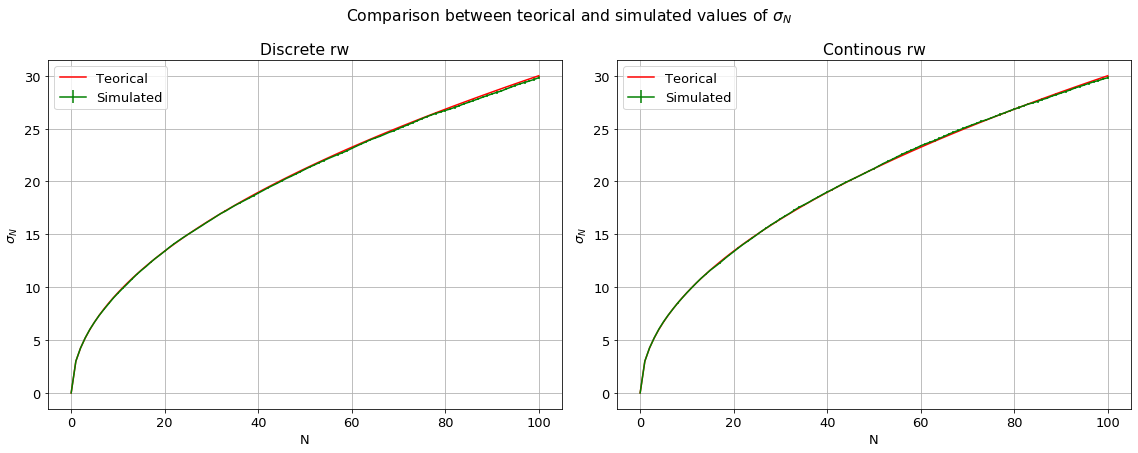

On the last step
(discrete)  estimate: 29.820200 ± 0.1253460,	expected value:  30.0
(continous) estimate: 29.809800 ± 0.1269400,	expected value:  30.0


In [8]:
x = np.arange(len(df_discrete))
a = 3
colors = ["green", "blue"]
labels = ["Simulated (discrete rw)", "Simulated (continous rw)"]

plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2) = plt.subplots(figsize=(16, 6), ncols=2)
fig.suptitle(r"Comparison between teorical and simulated values of $\sigma$$_N$", y=1.05)

ax = ax1
ax.set_title("Discrete rw")
ax.errorbar(x, df_discrete.iloc[:, 0], yerr=df_discrete.iloc[:, 1], color="green", label="Simulated")
ax.plot(x, sigma(x, a), color="red", label="Teorical")
ax.set_xlabel("N")
ax.set_ylabel(r"$\sigma$$_N$")
ax.grid(True)
ax.legend()

ax = ax2
ax.set_title("Continous rw")
ax.errorbar(x, df_continous.iloc[:, 0], yerr=df_continous.iloc[:, 1], color="green", label="Simulated")
ax.plot(x, sigma(x, a), color="red", label="Teorical")
ax.set_xlabel("N")
ax.set_ylabel(r"$\sigma$$_N$")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

print("On the last step")
print(f"(discrete)  estimate: {format(df_discrete.iloc[-1, 0], '.6f')} ± {format(df_discrete.iloc[-1, 1], '.7f')},\texpected value: ", a*np.sqrt(100))
print(f"(continous) estimate: {format(df_continous.iloc[-1, 0], '.6f')} ± {format(df_continous.iloc[-1, 1], '.7f')},\texpected value: ", a*np.sqrt(100))

As anticipated, we now want to simulate a 3D Random Walk in two ways:

1. on a cubic lattice (left picture): the walker makes a forward or backward step of length equal to $a = 3$ in one of the 3 principal directions of the lattice, $(x, y, z)$; 
2. in the continuum (right picture): at each discrete time the walker makes a step of length equal to $a = 3$ along a random direction obtained by sampling uniformly the solid angle $\theta \in [0,2\pi]$ and $\phi \in [0,\pi]$.

We can observe that the estimates are compatible with the exact result within (two times) the statistical error.